## PCA -Project 7

#### Importing required libraries

In [1]:
import os as os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA as PCA

In [2]:
os.getcwd()

'C:\\Users\\archana'

#### Reading the dataset

In [3]:
os.chdir("C:\\Users\\archana\\Desktop\\DSP\\Py")
df= pd.read_csv("house_price.csv")

In [4]:
df.shape
#df has 81 columns(79 feature +id and output var-SalePrice)
#it also has 1460 observartions

(1460, 81)

In [5]:
#checking datatypes of all the coulmns in the dataset
pd.set_option("display.max_rows", 100)
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#Finding the statistical details of all numerical variables in the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#Finding the quantitative and qualitative variables of the dataset
len(df.describe().columns) # gives total no of quatitative  variables

num_var = df.dtypes[(df.dtypes!="object")].index
print("No of Numerical features: ",len(num_var))

cat_var = df.dtypes[(df.dtypes=="object")]
print("No of Categorical features: ",len(cat_var))

No of Numerical features:  38
No of Categorical features:  43


#### Checking correlation between Numerical variables and Sale Price

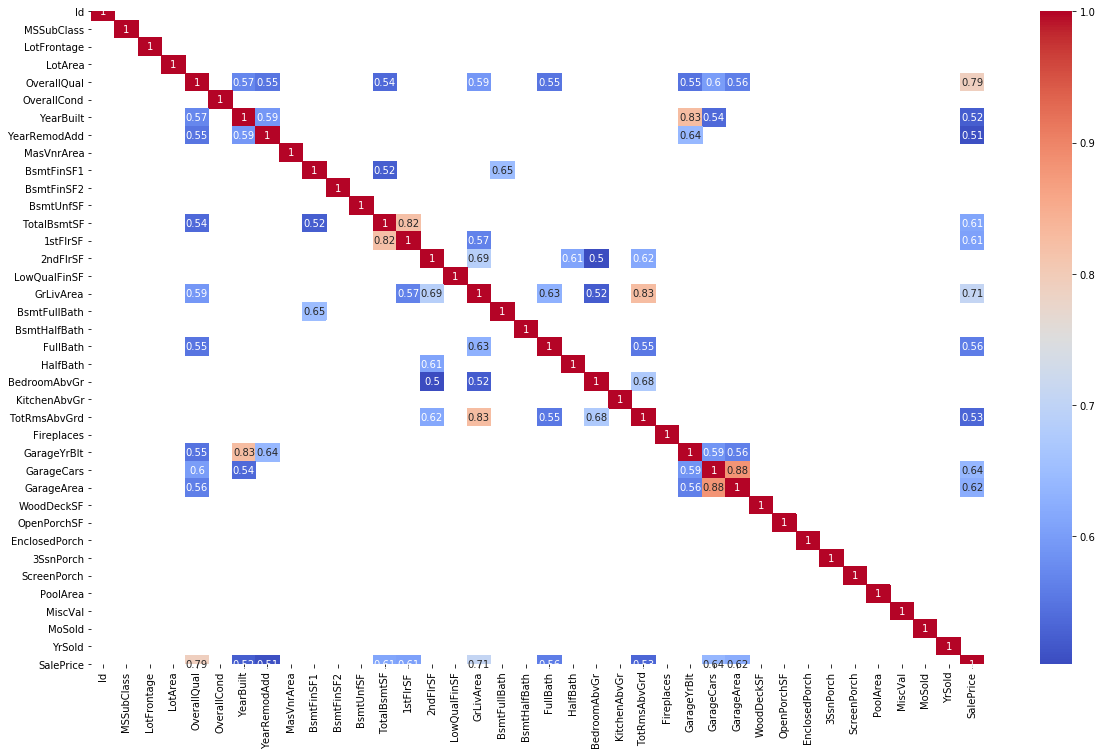

In [9]:
#creating a sub dataset with only numerical features
num_df = df[num_var]
#finding the correlation between the numerical features
corr_matrix=num_df.corr()
#correlation  >.05 is only considered
corr_matrix_new= corr_matrix[corr_matrix>.5]
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix_new,cmap="coolwarm",annot=True)
plt.show()

Correleation of Sale Price and some features are high:OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea, FullBath,TotalBsmtArea,GarageCars,GarageArea.
 
 Multicollerinarity alos exists b/w few variables. eg: GarageYrBuilt and YearBuilt

#### Data Visualisation

#### SalePrice

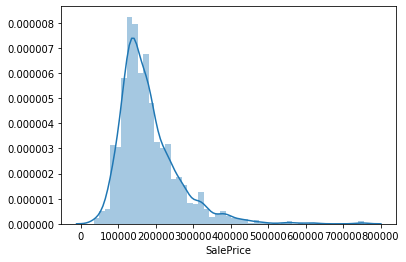

In [10]:
sns.distplot(df.SalePrice)
plt.show()

SalePrice is right skewed. Not a normal distribution

#### Overall Quality Vs SalePrice

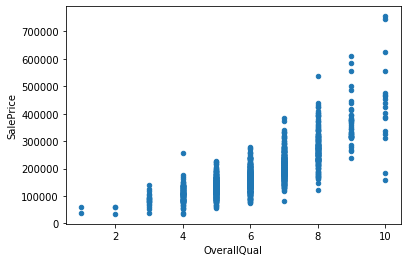

In [11]:
data=pd.concat([df.OverallQual,df.SalePrice],axis=1)
data.plot.scatter("OverallQual","SalePrice")

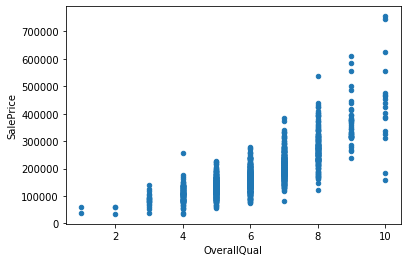

In [12]:
data=pd.concat([df.OverallQual,df.SalePrice],axis=1)
data.plot.scatter("OverallQual","SalePrice")

OverallQual- ordinal in nature

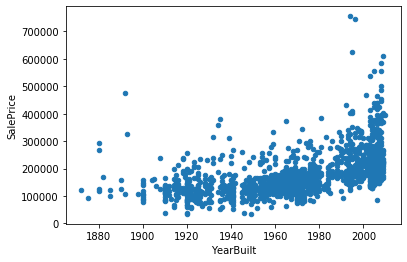

In [13]:
data=pd.concat([df.YearBuilt,df.SalePrice],axis=1)
data.plot.scatter("YearBuilt","SalePrice")

YearBuilt has an upward trend

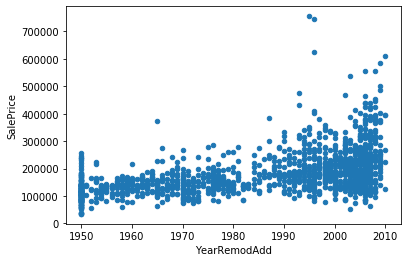

In [14]:
data=pd.concat([df.YearRemodAdd,df.SalePrice],axis=1)
data.plot.scatter("YearRemodAdd","SalePrice")

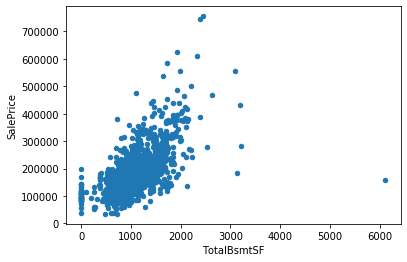

In [15]:
data=pd.concat([df.TotalBsmtSF,df.SalePrice],axis=1)
data.plot.scatter("TotalBsmtSF","SalePrice")

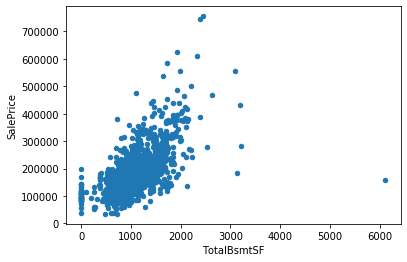

In [16]:
data=pd.concat([df.TotalBsmtSF,df.SalePrice],axis=1)
data.plot.scatter("TotalBsmtSF","SalePrice")

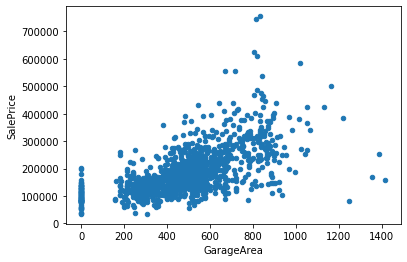

In [17]:
data=pd.concat([df.GarageArea,df.SalePrice],axis=1)
data.plot.scatter("GarageArea","SalePrice")

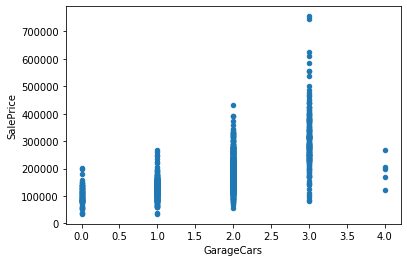

In [18]:
data=pd.concat([df.GarageCars,df.SalePrice],axis=1)
data.plot.scatter("GarageCars","SalePrice")

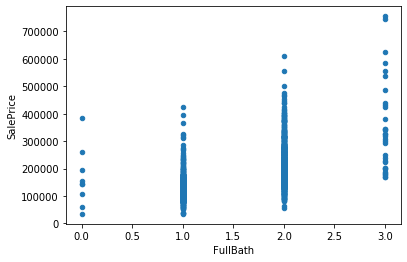

In [19]:
data=pd.concat([df.FullBath,df.SalePrice],axis=1)
data.plot.scatter("FullBath","SalePrice")

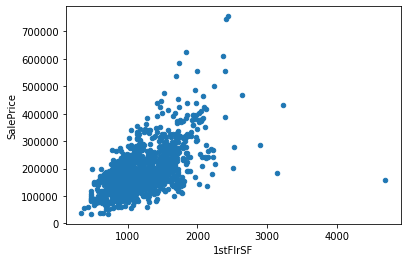

In [20]:
data=pd.concat([df["1stFlrSF"],df.SalePrice],axis=1)
data.plot.scatter("1stFlrSF","SalePrice")

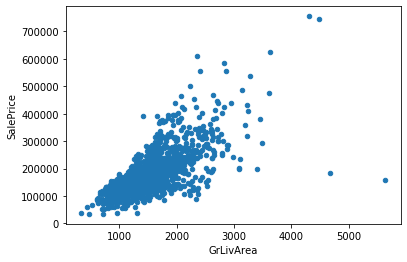

In [21]:
data=pd.concat([df.GrLivArea,df.SalePrice],axis=1)
data.plot.scatter("GrLivArea","SalePrice")

Correlation b/w GarageYrBlt and YearBuilt

C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


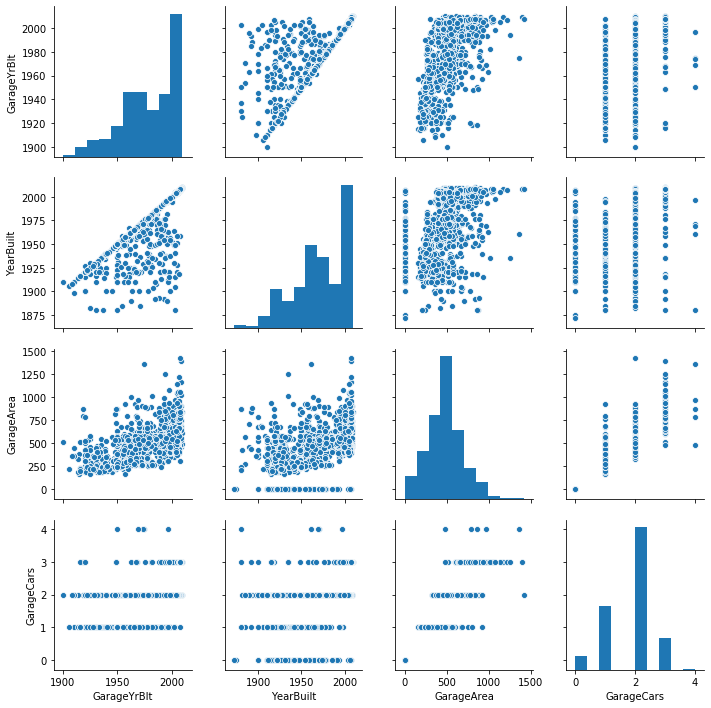

In [22]:
new1=pd.concat([df.GarageYrBlt,df.YearBuilt,df.GarageArea,df.GarageCars],axis=1)
sns.pairplot(new1)

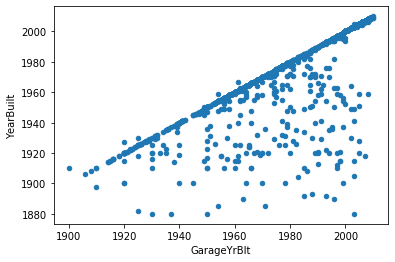

In [23]:
data=pd.concat([df.GarageYrBlt,df.YearBuilt],axis=1)
data.plot.scatter("GarageYrBlt","YearBuilt")

#### Visualising category variables

In [24]:
cat_var.index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

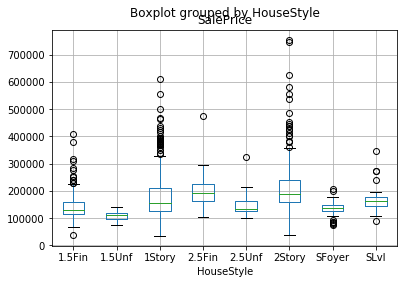

In [25]:
df.boxplot("SalePrice",by="HouseStyle")

#### Handling missing before applying PCA

In [26]:
total_missing_data= df.isnull().sum().sort_values(ascending=False)
percent_missing_data = df.isnull().mean().sort_values(ascending=False)
missing_data=pd.concat([total_missing_data,percent_missing_data],axis=1,keys=["Total","Percent"])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


#### Imputing Missing Values

In [27]:
df.PoolQC=df.PoolQC.fillna("None")
df.MiscFeature=df.MiscFeature.fillna("None")
df.Alley=df.Alley.fillna("None")
df.Fence=df.PoolQC.fillna("None")
df.FireplaceQu=df.FireplaceQu.fillna("None")
df.LotFrontage=df.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [28]:
for i in ("GarageCond","GarageType","GarageFinish","GarageQual"):
    df[i]=df[i].fillna("None")

In [29]:
for i in ("GarageYrBlt","GarageArea","MasVnrArea","GarageCars"):
    df[i]=df[i].fillna(0)

In [30]:
for i in ("BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual"):
    df[i]=df[i].fillna("None")

In [31]:
for i in ("MasVnrType","Electrical"):
    df[i]=df[i].fillna("None")

In [32]:
df.OverallCond=df.OverallCond.astype(str)
df.MSSubClass=df.MSSubClass.apply(str)
df.YrSold=df.YrSold.astype(str)
df.MoSold=df.MoSold.astype(str)

Removing Utilities, since all the values are AllPub, except for one NoSeWa. This wont help in prediction. 

In [33]:
print(df.Utilities.value_counts())
df=df.drop(['Utilities'],axis=1) 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [34]:
from sklearn.preprocessing import LabelEncoder

cols=('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [35]:
for c in cols:
    label_ec=LabelEncoder()
    df[c]=label_ec.fit_transform(list(df[c].values))
    

One Hot Encoding

In [36]:
df= pd.get_dummies(df)

In [37]:
df.shape

(1460, 223)

Removing target variable (for PCA , only input variables are considered)

In [38]:
X = df.drop('SalePrice',axis=1)

### Standardizing the input variables

In [39]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
X_std=sc_x.fit_transform(X)

### PCA starts:

### 1)Computing Mean vector

In [40]:
mean_vec=np.mean(X_std,axis=0)

### 2)Computing Covariance matrix

In [41]:
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

In [42]:
print("Covariance matrix\n" ,cov_mat)

Covariance matrix
 [[ 1.0006854   0.01992535 -0.00338295 ...  0.00486876  0.01589233
  -0.02075242]
 [ 0.01992535  1.0006854   0.23801249 ...  0.02782127  0.02428959
  -0.09045685]
 [-0.00338295  0.23801249  1.0006854  ...  0.01367554 -0.07309658
   0.12098879]
 ...
 [ 0.00486876  0.02782127  0.01367554 ...  1.0006854  -0.25217909
  -0.03608658]
 [ 0.01589233  0.02428959 -0.07309658 ... -0.25217909  1.0006854
  -0.6547714 ]
 [-0.02075242 -0.09045685  0.12098879 ... -0.03608658 -0.6547714
   1.0006854 ]]


### Computing eigen vectors and eigen values

In [43]:
eig_values,eig_vectors=np.linalg.eig(cov_mat)
print("Eigen Values\n%s" , eig_values)

Eigen Values
%s [ 1.43153215e+01+0.00000000e+00j  6.96815167e+00+0.00000000e+00j
  6.26278762e+00+0.00000000e+00j  5.04909283e+00+0.00000000e+00j
  3.91920656e+00+0.00000000e+00j  3.75694649e+00+0.00000000e+00j
  3.65554826e+00+0.00000000e+00j  3.34429063e+00+0.00000000e+00j
  3.23690536e+00+0.00000000e+00j  3.21800950e+00+0.00000000e+00j
  2.99721885e+00+0.00000000e+00j  2.78464366e+00+0.00000000e+00j
  2.67182706e+00+0.00000000e+00j  2.60920456e+00+0.00000000e+00j
  2.58043696e+00+0.00000000e+00j  2.44934512e+00+0.00000000e+00j
  2.36385732e+00+0.00000000e+00j  2.33138333e+00+0.00000000e+00j
  2.23700577e+00+0.00000000e+00j  2.19188105e+00+0.00000000e+00j
  2.16592665e+00+0.00000000e+00j  2.14021106e+00+0.00000000e+00j
  2.09826461e+00+0.00000000e+00j  2.01957544e+00+0.00000000e+00j
  1.99872421e+00+0.00000000e+00j  1.93491348e+00+0.00000000e+00j
  1.92544205e+00+0.00000000e+00j  1.90840414e+00+0.00000000e+00j
  1.89316323e+00+0.00000000e+00j  1.87413435e+00+0.00000000e+00j
  1.79439

In [44]:
print("Eigen Vectors\n",eig_vectors)

Eigen Vectors
 [[-1.19316023e-03+0.j -2.75966622e-03+0.j -4.32367044e-03+0.j ...
   9.63260089e-17+0.j -7.95111539e-16+0.j -3.48874672e-16+0.j]
 [-1.97268919e-02+0.j  5.67285568e-02+0.j -2.40240004e-01+0.j ...
  -3.78191470e-16+0.j  6.21826452e-16+0.j -2.50137400e-16+0.j]
 [ 8.68755888e-02+0.j -7.70540991e-02+0.j -1.90661228e-01+0.j ...
   5.04825214e-16+0.j  2.59288151e-15+0.j -5.32119825e-16+0.j]
 ...
 [-8.43305609e-03+0.j -5.05858726e-03+0.j -1.02352190e-02+0.j ...
  -1.11003718e-01+0.j -6.63506966e-02+0.j  2.63347896e-02+0.j]
 [-6.10606712e-02+0.j -7.52368761e-02+0.j -2.44214263e-02+0.j ...
  -3.66454733e-01+0.j -2.19042455e-01+0.j  8.69386042e-02+0.j]
 [ 1.22934991e-01+0.j  1.09128225e-01+0.j  5.67556904e-02+0.j ...
  -2.67200287e-01+0.j -1.59714697e-01+0.j  6.33912402e-02+0.j]]


### 4)Sorting eigen vectors by decreasing order of eigen values

In [45]:
#Make a list of (eigen value,eigen vector) combinations
eig_pairs=[[np.abs(eig_values[i]),eig_vectors[i]] for i in range(len(eig_values))]

In [46]:
#Sorting in desc order:
eig_pairs.sort(key=lambda x:x[0],reverse=True)

In [47]:
print("Eigen values in descending order :\n")
for i in eig_pairs:
    print(i[0])

Eigen values in descending order :

14.315321456306332
6.968151670437717
6.262787623046755
5.049092828953301
3.91920656298117
3.7569464881527734
3.6555482560359134
3.3442906299681776
3.2369053644780386
3.21800950261746
2.9972188514967137
2.7846436598776187
2.6718270621219076
2.6092045635360352
2.5804369606439814
2.4493451215064037
2.3638573198214003
2.331383326437041
2.237005771022622
2.191881047696276
2.1659266493727074
2.1402110637379748
2.0982646051114484
2.019575435358112
1.9987242123624156
1.9349134840920714
1.9254420534274432
1.908404142395259
1.8931632314950522
1.8741343549820948
1.7943967987307754
1.7775426688143807
1.7582639367364523
1.7269461500089063
1.7136266705068035
1.649683855805653
1.6031199597823813
1.5830532505963808
1.5505663824985498
1.5440147122483254
1.5171212433408339
1.4949025212609115
1.4748931717181923
1.4507069088104796
1.433374978596496
1.4251532854577182
1.4097337127228817
1.4041190073817367
1.3677510707305605
1.3623967485679827
1.3452753668438806
1.3162180

### 5) Select components based on eigen values

Of the 222 components, select components whose eigen vectors with eigen values >0.5
NOTE: we have not taken eigen value cut off as 1, since if we select 1, there will be only 81 selected compoenents and information contained in other variables(138-81) are lost.Hence will affect the model.

In [48]:
pairs=np.array(eig_pairs)
count=0
components = []
for i in range(len(eig_pairs)):
    if eig_pairs[i][0]>=0.5:
        count+=1
        components.append(pairs[i])

print("Number of components:",str(count))


Number of components: 138


#### Information contained in the selected 81 components

In [49]:
#calculate explained variance 
total=0
ein=[]
for i in range(len(components)):
    total+=components[i][0]
    ein.append(components[i][0])

#divide eigen value by sum of eigen values and then multiply by 100
var_exp=[(i/sum(eig_values))*100 for i in sorted(ein,reverse=True)]
cum_var_exp=np.cumsum(var_exp)

In [50]:
cum_var_exp

array([ 6.44392633+0.j,  9.58058352+0.j, 12.39972678+0.j, 14.67253513+0.j,
       16.43673431+0.j, 18.12789343+0.j, 19.77340895+0.j, 21.27881436+0.j,
       22.73588117+0.j, 24.18444215+0.j, 25.53361601+0.j, 26.78710086+0.j,
       27.98980223+0.j, 29.16431459+0.j, 30.32587744+0.j, 31.42843037+0.j,
       32.49250165+0.j, 33.54195502+0.j, 34.5489251 +0.j, 35.53558265+0.j,
       36.51055703+0.j, 37.47395576+0.j, 38.41847262+0.j, 39.32756819+0.j,
       40.22727775+0.j, 41.09826343+0.j, 41.96498561+0.j, 42.82403832+0.j,
       43.67623046+0.j, 44.5198569 +0.j, 45.32759013+0.j, 46.1277366 +0.j,
       46.91920491+0.j, 47.69657577+0.j, 48.46795098+0.j, 49.21054284+0.j,
       49.93217434+0.j, 50.64477297+0.j, 51.34274791+0.j, 52.03777366+0.j,
       52.72069353+0.j, 53.39361183+0.j, 54.05752308+0.j, 54.71054707+0.j,
       55.35576924+0.j, 55.99729048+0.j, 56.63187073+0.j, 57.26392356+0.j,
       57.87960565+0.j, 58.49287754+0.j, 59.09844238+0.j, 59.69092732+0.j,
       60.27686089+0.j, 6

When we select 138 components,it has 93% of the information contained in alll the componenets

### 6)Scree Plot

C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


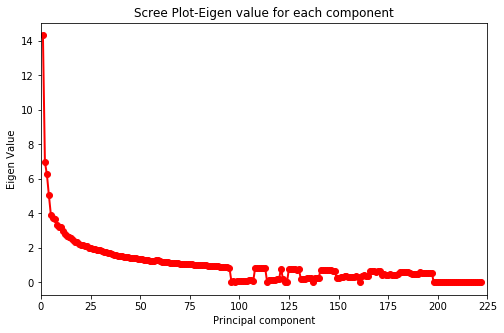

In [51]:
#make a random array and then make it positive defined
num_vars=len(eig_values)

fig=plt.figure(figsize=(8,5))
sing_vals=np.arange(num_vars)+1
plt.plot(sing_vals,eig_values,'ro-',linewidth=2)

plt.title("Scree Plot-Eigen value for each component")
plt.xlabel("Principal component")
plt.ylabel("Eigen Value")
plt.xlim(0,225)
plt.show()

As per the eigenvalue-one criterion/Kaiser criterion we retain and interpret any component with an eigenvalue greater than 1.00. So we chose 90 Principal componenets

In [52]:
#calculate explained variance 
#divide eigen value by sum of eigen values and then multiply by 100
var_exp=[(i/sum(eig_values))*100 for i in sorted(eig_values,reverse=True)]
cum_var_exp=np.cumsum(var_exp)

C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


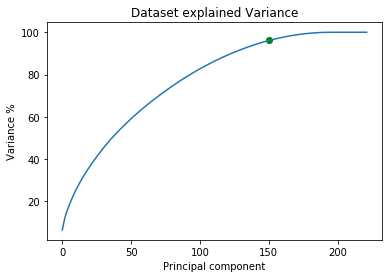

In [53]:
plt.figure()
plt.scatter([150],[cum_var_exp[150]],color='g')
plt.plot(cum_var_exp)
plt.title("Dataset explained Variance")
plt.xlabel("Principal component")
plt.ylabel("Variance %")
plt.show()

For above plot variance remains constant after no of components reaches 150.

In [54]:
cum_var_exp[150]

(96.10034568782523+0j)

###### Selected 150 PComponents has 96% information. Hence 150 variables selected, instead of 138

### 7)Deriving new dataset

In [55]:
#Filter out the eigen vector of selected components
N=222
M=150

a=np.ndarray(shape=(N,0))
for i in range(M):
    b=eig_pairs[i][1].reshape(N,1)
    a=np.hstack((a,b))
    

In [56]:
#Projection into new Feature space
Y=X_std.dot(a)

In [57]:
Y.shape

(1460, 150)

Columns reduced from 222 to 150

## PCA using sklearn

In [58]:
from sklearn.decomposition import PCA as PCA

We have 222 coulmns. so n_componenets= 221

In [59]:
pca= PCA(n_components=222)
Y=pca.fit_transform(X_std)

In [60]:
print(pca.explained_variance_ratio_)

[6.44392633e-02 3.13665719e-02 2.81914326e-02 2.27280835e-02
 1.76419918e-02 1.69115912e-02 1.64551552e-02 1.50540541e-02
 1.45706680e-02 1.44856098e-02 1.34917386e-02 1.25348485e-02
 1.20270137e-02 1.17451236e-02 1.16156285e-02 1.10255292e-02
 1.06407128e-02 1.04945337e-02 1.00697008e-02 9.86657549e-03
 9.74974386e-03 9.63398723e-03 9.44516864e-03 9.09095570e-03
 8.99709560e-03 8.70985676e-03 8.66722188e-03 8.59052710e-03
 8.52192137e-03 8.43626442e-03 8.07733225e-03 8.00146475e-03
 7.91468309e-03 7.77370860e-03 7.71375204e-03 7.42591863e-03
 7.21631501e-03 7.12598634e-03 6.97974933e-03 6.95025751e-03
 6.82919874e-03 6.72918295e-03 6.63911248e-03 6.53023997e-03
 6.45222169e-03 6.41521240e-03 6.34580244e-03 6.32052830e-03
 6.15682097e-03 6.13271892e-03 6.05564840e-03 5.92484933e-03
 5.85933575e-03 5.83020256e-03 5.74799778e-03 5.72973326e-03
 5.68498209e-03 5.60832029e-03 5.54307523e-03 5.50433420e-03
 5.39877939e-03 5.35040307e-03 5.28230284e-03 5.23934938e-03
 5.18022503e-03 5.063322

Select components based on singular value instead of eigen values

In [61]:
pca.singular_values_

array([1.44520082e+02, 1.00829228e+02, 9.55897858e+01, 8.58290536e+01,
       7.56182675e+01, 7.40363757e+01, 7.30304382e+01, 6.98521297e+01,
       6.87215027e+01, 6.85206236e+01, 6.61282262e+01, 6.37400588e+01,
       6.24355322e+01, 6.16995094e+01, 6.13584348e+01, 5.97795494e+01,
       5.87270622e+01, 5.83222794e+01, 5.71296020e+01, 5.65504593e+01,
       5.62146510e+01, 5.58799422e+01, 5.53296309e+01, 5.42822306e+01,
       5.40012836e+01, 5.31322762e+01, 5.30020750e+01, 5.27670507e+01,
       5.25559241e+01, 5.22911276e+01, 5.11666388e+01, 5.09257769e+01,
       5.06488606e+01, 5.01957611e+01, 5.00018131e+01, 4.90600524e+01,
       4.83627131e+01, 4.80590750e+01, 4.75633930e+01, 4.74628009e+01,
       4.70476343e+01, 4.67018498e+01, 4.63882435e+01, 4.60063189e+01,
       4.57306691e+01, 4.55993272e+01, 4.53519734e+01, 4.52615690e+01,
       4.46715660e+01, 4.45840426e+01, 4.43030107e+01, 4.38219370e+01,
       4.35789847e+01, 4.34705102e+01, 4.31629591e+01, 4.30943284e+01,
      

### Scree Plot

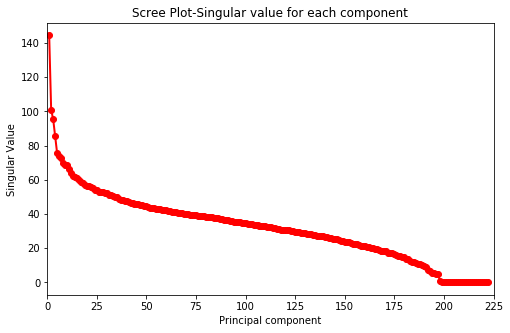

In [62]:
#make a random array and then make it positive defined
num_vars=len(pca.singular_values_)

fig=plt.figure(figsize=(8,5))
sing_vals=np.arange(num_vars)+1
plt.plot(sing_vals,pca.singular_values_,'ro-',linewidth=2)

plt.title("Scree Plot-Singular value for each component")
plt.xlabel("Principal component")
plt.ylabel("Singular Value")
plt.xlim(0,225)
plt.show()

From the above plot, 150 componenets has singular value >25.So we select 150

### Explained Variance

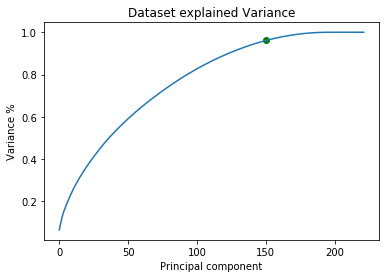

In [63]:
#calculate explained variance 
#divide eigen value by sum of eigen values and then multiply by 100
cum_var_exp=np.cumsum(pca.explained_variance_ratio_)
plt.figure()
plt.scatter([150],[cum_var_exp[150]],color='g')
plt.plot(cum_var_exp)
plt.title("Dataset explained Variance")
plt.xlabel("Principal component")
plt.ylabel("Variance %")
plt.show()

In [64]:
cum_var_exp[150]

0.9610034568782524

Finally 150 components selected.Selected 150 PComponents has 96% information

In [65]:
pca= PCA(n_components=150)
Y=pca.fit_transform(X_std)

### New Dataset

In [66]:
Y.shape

(1460, 150)

No of columns reduced from 222 to 150